# Unsupervised Machine Learning
Author: Kusum Gadekar 

GRIP-The Spark Foundation

Task 2- Prediction using unsupervised ML

Dataset used: Iris dataset, which is available in sklearn library.

Alternatively, it can be downloaded through the following link - https://bit.ly/2TK5Xn5

Problem Statement : Predict the optimum number of clusters and represent it visually.


In [131]:
#IMPORTING ALL REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.datasets import load_iris


In [76]:
#TO READ THE DATA
iris = sns.load_dataset('iris')
iris


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Data Imported Successfully

In [77]:
#TO GET FIRST FIVE ROWS FROM DATASET
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


First five rows of dataset

In [78]:
#TO CHECK HOW MANY ROWS AND COLUMNS IN DATA
iris.shape

(150, 5)

In [97]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


As,we can see that there is 150 rows and 5 columns in dataset

In [80]:
#TO CHECK NULL VALUES IN DATA
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

From the above calculation ,we can see that there is no null value in data

In [84]:
#TO CHECK ANY DUPLICATE VALUES IN DATA
iris.duplicated().sum()

1

In [92]:
# drop duplicate rows
iris.drop_duplicates(inplace=True) 
iris.shape[0]  

149

 Gives number of rows. Similarly, data.shape[1]  will give number of columns

 now number of rows left 149, earlier there were 150 rows.

In [93]:
#TO GET ALL COLUMNS NAMES AVAILABLE IN DATASET
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [94]:
#TO CHECK HOW MANY EXAMPLES WE HAVE OF EACH SPECIES    
iris["species"].value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

In [95]:
#TO GET STATISCAL SUMMARY OF DATA
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


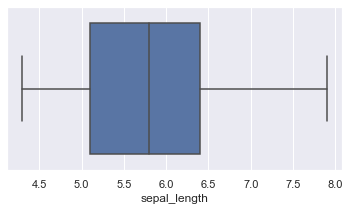

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


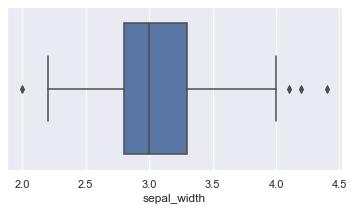

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


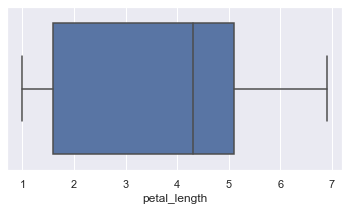

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


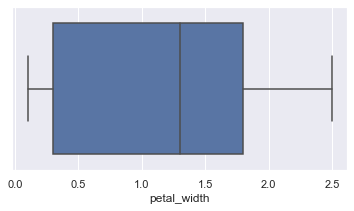

In [100]:
#checking for any outliers in the numeric data 
for i in iris.columns:
    if iris[i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(iris[i])
        plt.show() 

In [107]:
# Treating outliers present in the SepalWidth column

q1,q3 = np.percentile(iris['sepal_width'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
iris['sepal_width'] = iris['sepal_width'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)

C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


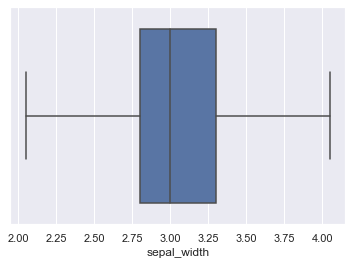

In [108]:
sns.boxplot(iris['sepal_width']);

# Understanding the data

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64


C:\Users\dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


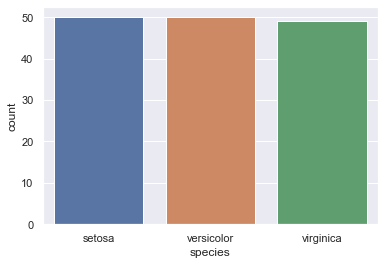

In [109]:
#Target class
print(iris.species.value_counts())
sns.countplot(iris.species);

In [110]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Data Visualisation:

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


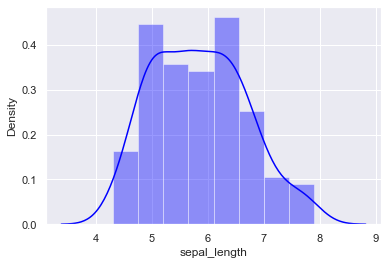

In [125]:
#Distribution of features by Species
#TO CHECK THE VARIATIONS IN DATA DISTRIBUTION
sns.distplot(iris["sepal_length"],color="blue")
sns.set(rc={'figure.figsize':(7,5)})

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


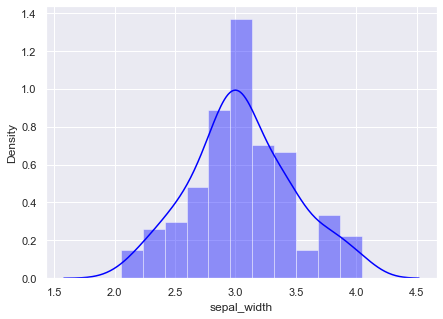

In [126]:
sns.distplot(iris["sepal_width"],color="blue")
sns.set(rc={'figure.figsize' :(7,5)})

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


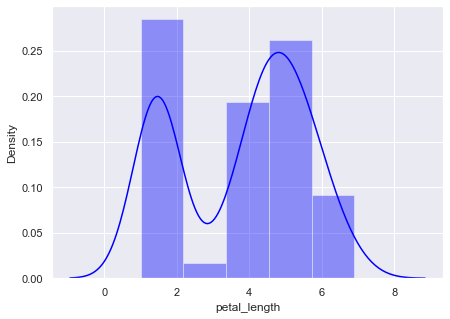

In [127]:
sns.distplot(iris["petal_length"],color="blue")
sns.set(rc={'figure.figsize' : (7,5)})

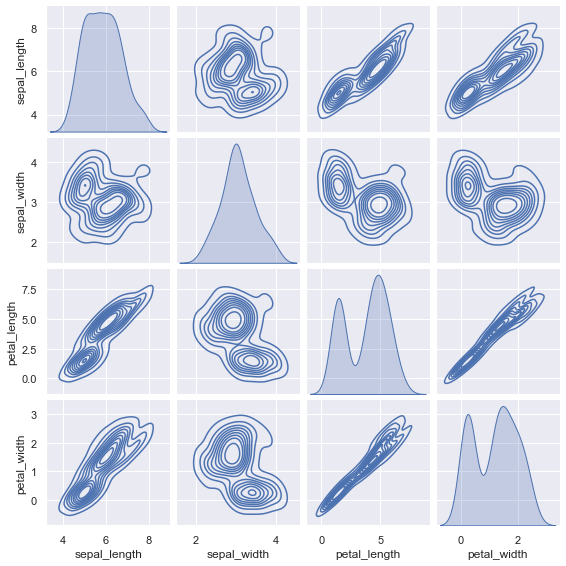

In [132]:
#TO CHECK PAIRWISE RELATIONSHIPS IN DATASET 
sns.pairplot(iris,height=2, kind= 'kde')

In [128]:
#Covariance
iris.cov()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.690314,-0.042206,1.283321,0.519966
sepal_width,-0.042206,0.181327,-0.320247,-0.117567
petal_length,1.283321,-0.320247,3.125083,1.297968
petal_width,0.519966,-0.117567,1.297968,0.581593


In [116]:
#Correlation between variables. Checking if change in one variable affects the other
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,0.690314,-0.042206,1.283321,0.519966
sepal_width,-0.042206,0.181327,-0.320247,-0.117567
petal_length,1.283321,-0.320247,3.125083,1.297968
petal_width,0.519966,-0.117567,1.297968,0.581593


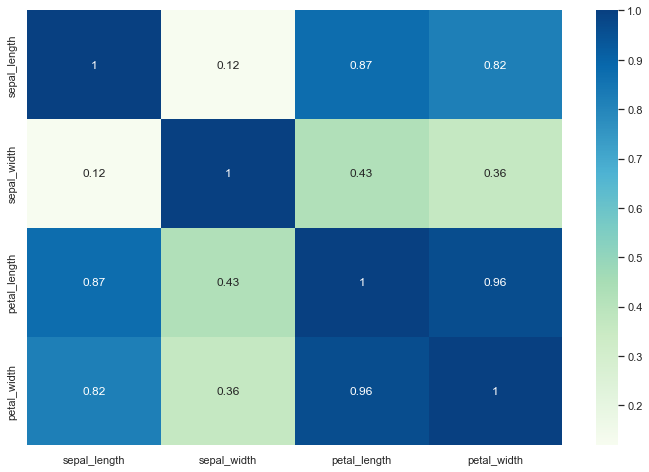

In [122]:
#Correlation Matrix
plt.figure(figsize=(12,8))
sns.heatmap(abs(iris.corr()),cmap= 'GnBu', annot= True);

## Using the elbow method to find the optimal number of clusters

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


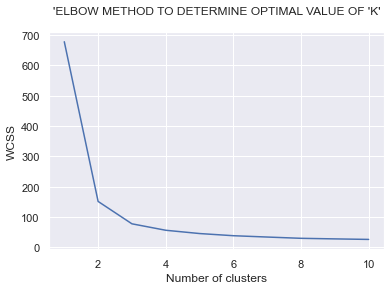

In [143]:
#TO FIND OPTIMAL NUMBER OF CLUSTERS FOR K MEANS CLUSTRING 
x=iris.iloc[:,:-1].values
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n")
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Above we can see that elbow has occured where the number of clusters is 3.

In [144]:
# APPLYING KMEANS TO THE DATASET 
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [145]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [147]:
iris['cluster'] = y_kmeans

iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,2
148,6.2,3.4,5.4,2.3,virginica,2


In [150]:
display(iris['cluster'].value_counts(), iris['species'].value_counts())

1    61
0    50
2    38
Name: cluster, dtype: int64

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

In [151]:
iris['species_encoded'] = iris['species'].apply(lambda x: 1 if x=='iris-setosa' else 2 if x=='iris-virginica' else 0)
iris

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,species_encoded
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,2,0
146,6.3,2.5,5.0,1.9,virginica,1,0
147,6.5,3.0,5.2,2.0,virginica,2,0
148,6.2,3.4,5.4,2.3,virginica,2,0


In [152]:
from sklearn.metrics import classification_report
print(classification_report(iris['species_encoded'], iris['cluster']))

              precision    recall  f1-score   support

           0       1.00      0.34      0.50       149
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0

    accuracy                           0.34       149
   macro avg       0.33      0.11      0.17       149
weighted avg       1.00      0.34      0.50       149



C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


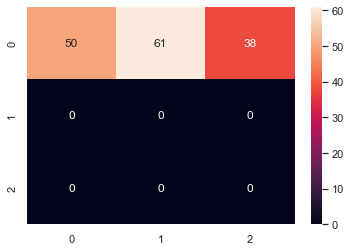

In [153]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(iris['species_encoded'],iris['cluster']), annot=True);

## Visualize the test set result

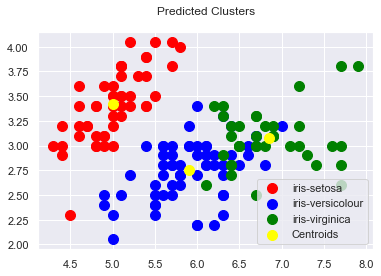

In [148]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'iris-virginica')

#PLOTTING THE CENTROIDS OF THE CLUSTERS 
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()